# Data Science 1 - Machine Learning Concepts: Final Assignment

#### *Course:* Data Science 1
#### *Author:* Marcell Magda

### Import Libraries 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA

# Section 1

## 1.a 

In [2]:
# Ensuring reproducibility of results
np.random.seed(20240315)

# Setting the sample size
sample_size = 20
true_beta_0 = 1  # True intercept, the only parameter in this simple model

# Generating normally distributed error terms
error_terms = np.random.normal(0, 1, size=sample_size)

# Creating the response variable Y
Y_values = true_beta_0 + error_terms

# Selecting a lambda value for regularization
lambda_for_ridge = 3.0

# Defining the ridge regression estimator for beta_0
def calculate_ridge_beta_0(Y, lambda_value):
    return np.sum(Y) / (len(Y) + lambda_value)

# Computing the OLS estimator (mean of Y) and Ridge estimator for beta_0
ols_estimator = np.mean(Y_values)
ridge_estimator = calculate_ridge_beta_0(Y_values, lambda_for_ridge)

# Displaying the estimators
print(f"OLS estimator for beta_0: {ols_estimator:.3f}")
print(f"Ridge estimator for beta_0: {ridge_estimator:.3f}")

# Calculating and displaying the difference
difference_in_estimators = ols_estimator - ridge_estimator
print(f"Difference between OLS and Ridge estimators: {difference_in_estimators:.3f}")

# Enhanced explanation of results
print("-"*50)
print(f"""Comparing the estimators reveals that the OLS estimator ({ols_estimator:.3f}) is slightly higher than the Ridge estimator ({ridge_estimator:.3f}).
This indicates that incorporating the regularization term (lambda = {lambda_for_ridge}) slightly reduces the estimate of beta_0 by {difference_in_estimators:.3f}.
This reduction reflects the trade-off introduced by regularization: it potentially increases bias in order to reduce variance, which can lead to more robust predictions in situations with high multicollinearity or when using large numbers of predictors.""")


OLS estimator for beta_0: 1.013
Ridge estimator for beta_0: 0.881
Difference between OLS and Ridge estimators: 0.132
--------------------------------------------------
Comparing the estimators reveals that the OLS estimator (1.013) is slightly higher than the Ridge estimator (0.881).
This indicates that incorporating the regularization term (lambda = 3.0) slightly reduces the estimate of beta_0 by 0.132.
This reduction reflects the trade-off introduced by regularization: it potentially increases bias in order to reduce variance, which can lead to more robust predictions in situations with high multicollinearity or when using large numbers of predictors.


## 1.b

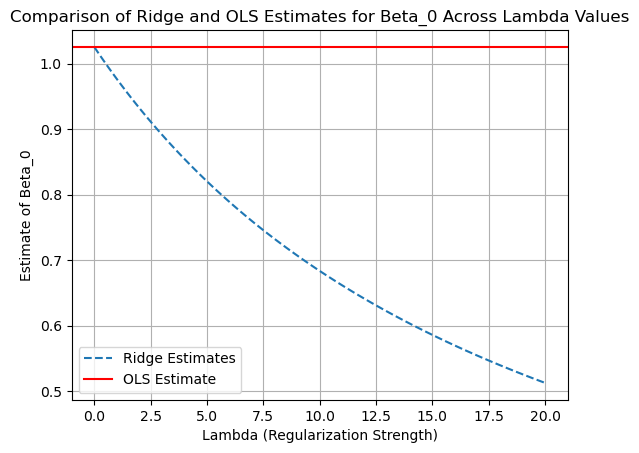

In [3]:
# Setting up the environment for reproducibility and defining parameters
np.random.seed(20240315)
sample_size = 20  # Number of observations
true_beta_0 = 1  # True intercept value

# Generating error terms with mean 0 and variance 4 (standard deviation is 2)
standard_deviation = 2  # Correct standard deviation for the given variance
error_terms = np.random.normal(0, standard_deviation, size=sample_size)

# Generating Y values using the true model intercept and error terms
Y_values = true_beta_0 + error_terms

# Defining a range of lambda values for regularization strength
lambda_range = np.linspace(0, 20, 100)

# Ridge estimator calculation adjusted for clear understanding
def compute_ridge_beta_0(Y, lambda_value, n):
    return np.sum(Y) / (n + lambda_value)

# Calculating ridge estimates for each lambda in the range
ridge_estimates = [compute_ridge_beta_0(Y_values, lambda_val, sample_size) for lambda_val in lambda_range]

# Plotting the ridge estimates against lambda values
plt.plot(lambda_range, ridge_estimates, label='Ridge Estimates', linestyle='--', markersize=4)

# Calculating the OLS estimate for beta_0 and plotting it for comparison
ols_estimate = np.mean(Y_values)
plt.axhline(y=ols_estimate, color='r', linestyle='-', label='OLS Estimate')

# Enhancing the plot with appropriate labels and title
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Estimate of Beta_0')
plt.title('Comparison of Ridge and OLS Estimates for Beta_0 Across Lambda Values')
plt.legend()
plt.grid(True)
plt.show()


## 1.c

In [4]:
# Setting up the simulation parameters
num_simulations = 1000
lambda_range = np.linspace(0, 20, 100)
n_observations = 20  # Assuming n and beta_0 are defined as before
beta_0_true = 1
sigma_epsilon = 2  # Standard deviation corresponding to variance of 4

# Define the ridge regression estimator function
def calculate_ridge_estimate(Y_samples, lambda_value, n_samples):
    return np.sum(Y_samples) / (n_samples + lambda_value)

# Array to store the results from each simulation for every lambda value
simulation_results = np.zeros((num_simulations, len(lambda_range)))

# Running the simulations
for sim in range(num_simulations):
    errors = np.random.normal(0, sigma_epsilon, size=n_observations)
    Y_simulation = beta_0_true + errors
    
    for idx, lambda_val in enumerate(lambda_range):
        simulation_results[sim, idx] = calculate_ridge_estimate(Y_simulation, lambda_val, n_observations)

# Compute bias squared, variance, and MSE for each lambda value
bias_squared_values = (np.mean(simulation_results, axis=0) - beta_0_true) ** 2
variance_values = np.var(simulation_results, axis=0)
mse_values = bias_squared_values + variance_values

# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Lambda': lambda_range,
    'Bias^2': bias_squared_values,
    'Variance': variance_values,
    'MSE': mse_values
})

# Output the DataFrame for review
results_df.head()


,Lambda,Bias^2,Variance,MSE
0,0.000000,0.000037,0.200151,0.200188
1,0.202020,0.000016,0.196168,0.196184
2,0.404040,0.000191,0.192303,0.192494
3,0.606061,0.000551,0.188551,0.189102
4,0.808081,0.001086,0.184907,0.185994


## 1.d.1 - Code

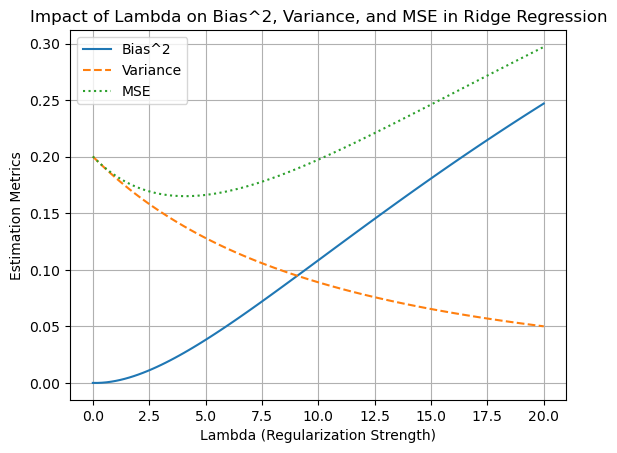

In [5]:
# Plot Bias^2, Variance, and MSE against lambda values
plt.plot(results_df['Lambda'], results_df['Bias^2'], label='Bias^2', linestyle='-', markersize=5)
plt.plot(results_df['Lambda'], results_df['Variance'], label='Variance', linestyle='--', markersize=5)
plt.plot(results_df['Lambda'], results_df['MSE'], label='MSE', linestyle=':', markersize=5)

# Adding labels and title for clarity
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Estimation Metrics')
plt.title('Impact of Lambda on Bias^2, Variance, and MSE in Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()


Bias^2: Increases with λ. Regularization introduces bias into the model by shrinking coefficient estimates towards zero, which can move them away from their true values.

Variance: Decreases with λ. By penalizing large coefficients, ridge regression reduces the model's sensitivity to fluctuations in the training data, which in turn lowers the variance.

MSE: Initially decreases with λ, reaching a minimum at an optimal level of regularization before increasing again. This reflects the trade-off between bias and variance: initially, the reduction in variance outweighs the increase in bias, but beyond a certain point, the added bias starts to dominate.

## 1.d.2 - Question Answer

Ridge regression has the potential to offer better predictions than OLS in certain situations, especially in the presence of multicollinearity or when the number of predictors is large relative to the number of observations. By adding a penalty on the size of coefficients, ridge regression can reduce overfitting, leading to more reliable predictions on new, unseen data.

However, whether ridge regression outperforms OLS depends on the specific characteristics of the dataset. For datasets with low multicollinearity and where the model is not prone to overfitting, OLS may perform equally well or better. The key is to balance the trade-off between bias and variance to achieve the lowest possible MSE, and the optimal λ value for ridge regression can vary depending on the dataset's features.

# Section 2

### These are the choices:

#### - i. 
Increase initially, and then eventually start decreasing in an inverted U shape.

#### - ii. 
Decrease initially, and then eventually start increasing in a U shape.

#### - iii. 
Steadily increase.

#### - iv. 
Steadily decrease.

#### - v. 
Remain constant.

## 2.a

**Choice:** iv

**Explaination:** As we increase *s* from 0, the training RSS will steadily decrease. Initially, when *s* is very small (close to 0), the constraint on the coefficients is very tight, which means most coefficients are forced to be zero or very close to zero, leading to a simpler model with higher bias and potentially higher RSS. As *s* increases, more coefficients can move away from zero, allowing the model to fit the training data more closely and thus reducing the RSS. This effect continues as *s* increases because the constraint becomes less restrictive, allowing for a more complex model that can better capture the variability in the data.

## 2.b

**Choice:** ii

**Explaination:** As *s* increases from 0, test RSS will initially decrease and then eventually start increasing in a U shape. At very low values of *s*, the model is too simple and underfits the data, resulting in high bias and high test RSS. As *s* increases, the model becomes more flexible, reducing bias and test RSS up to a certain point. However, beyond this point, further increases in *s* make the model too flexible, leading to overfitting, where the model captures noise in the training data that does not generalize to new, unseen data, causing the test RSS to increase again.

## 2.c

**Choice:** iii

**Explaination:** Variance will steadily increase as *s* increases. A lower value of *s* imposes a tighter constraint on the coefficients, leading to simpler models that do not vary much with different training data sets (low variance). As *s* increases, the model becomes more complex, with more coefficients deviating from zero, allowing the model to change more with variations in the training data (high variance).

## 2.d

**Choice:** iv

**Explaination:** Squared bias will steadily decrease as *s* increases. When *s* is close to 0, the model is highly constrained and too simple, leading to a high error due to bias. As *s* increases, allowing more coefficients to be non-zero and the model to become more complex, the bias decreases because the model can better capture the true relationship in the data.

## 2.e

**Choice:** v

**Explaination:** The irreducible error will remain constant regardless of *s*. This is because irreducible error is determined by the noise inherent in the data that cannot be reduced by any model improvements. Changing *s* affects the model complexity and the balance between bias and variance, but it does not impact the irreducible error.

# Section 3

## 3.a

In [6]:
# Load the dataset from the provided URL
data_url = "PCA_data.csv"
dataset = pd.read_csv(data_url)

# Split the dataset into training and test sets
training_data = dataset[:500]  # First 500 observations for training
testing_data = dataset[500:]   # Last 500 observations for testing

dataset.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
0,-6.539179,0.948014,1.259177,0.763472,0.128735,0.410222,0.420989,-0.101123,-1.242581,0.029933,...,-0.859282,-1.645036,-0.247500,1.372374,-0.212618,-1.368046,-1.740719,0.925212,0.123907,-1.020763
1,2.036508,0.019661,-1.951131,-1.097787,0.919061,-0.069719,0.405042,1.808955,-0.343013,1.465924,...,-1.809128,0.381091,0.497534,0.632532,-1.429868,-2.092106,0.499216,1.026407,-0.763639,-0.405548
2,7.295433,0.283019,1.127620,1.458154,0.227844,-2.003859,-1.775359,-2.480777,0.506680,0.852822,...,0.091664,0.655664,-0.191965,1.194055,0.326962,0.399151,0.723069,0.939017,-1.132469,0.212292
3,6.825405,0.845641,-0.921489,-1.368601,2.085195,-0.294420,1.029018,0.098418,-0.677591,-1.276767,...,-0.280935,-0.523440,-0.230028,1.939640,-0.429125,0.701319,-1.008541,1.055334,-0.782659,0.749695
4,-0.176432,0.566670,0.667277,-0.248455,1.361258,0.041326,0.149155,-0.271543,0.229179,0.089760,...,-0.728898,-0.124473,-0.842829,-0.132558,-0.236122,-0.751535,0.191009,0.007180,-0.350858,0.384321


## 3.b

In [7]:
# Initialize PCA to extract the top 10 components
pca_model = PCA(n_components=10)

# Apply PCA to the entire dataset excluding the target variable 'Y'
pca_components = pca_model.fit_transform(dataset)

# Display the principal component vectors and scores
print("Principal Component Vectors:", pca_model.components_)
print("\nPrincipal Component Scores (first 10 rows):", pca_components[:10])


Principal Component Vectors: [[ 9.42837042e-01 -3.38328778e-02  2.70643183e-02 -7.40992851e-02
   1.00721272e-01  3.33766462e-02 -1.51012336e-02 -1.83325163e-02
   9.06867661e-02  2.95458645e-02  2.88390509e-02  2.40804933e-02
   4.06484431e-02 -1.33666582e-02  7.28927440e-02  7.08165713e-02
   2.30847393e-02 -4.15986653e-02 -5.48703823e-02  1.27008686e-02
   7.07370214e-02  4.99330549e-02 -4.59697640e-02  4.11252666e-02
   1.43125661e-03 -8.27499975e-02  4.54200717e-02 -4.29773781e-02
   3.37394905e-02  5.72307880e-02  1.58583910e-02  4.30086370e-02
  -5.79351974e-03  8.39331630e-03 -1.64308438e-02 -5.09154497e-03
   7.26760626e-02  1.69014174e-02  9.78800450e-02  5.47583077e-02
   1.61203095e-03 -2.17076729e-02  9.70830720e-02  4.19119291e-02
   3.05228676e-02  8.79532895e-03  5.44633484e-03  3.39672337e-02
   4.15795039e-02  1.35422562e-02  2.96899753e-02]
 [-1.67584579e-02  4.14500267e-02 -9.80782206e-02 -2.56521527e-01
   1.74384637e-01  2.38122636e-01  2.90372590e-01  1.97278207e

## 3.c

In [8]:
# Results list for storing model performance metrics
results = []

In [9]:
# Prepare the training and test sets for the regression
X_train = training_data.drop('Y', axis=1)
y_train = training_data['Y']
X_test = testing_data.drop('Y', axis=1)
y_test = testing_data['Y']

# Fit the OLS model using all X variables in the training set
ols_model = LinearRegression().fit(X_train, y_train)

# Predict on the training set and calculate MSE
predictions = ols_model.predict(X_test)
mse = np.mean((predictions - y_test) ** 2)

results.append({"Model": "OLS", "MSE": mse})

print(f"OLS Model Coefficients: {ols_model.coef_}")
print(f"MSE: {mse}")

OLS Model Coefficients: [-2.51544834e+04 -2.05356887e+05  2.80152377e+05  1.21008525e+05
  2.36374037e+05 -3.22328561e+04 -8.14402482e+04  3.66374449e+04
 -2.41474770e+04  1.75635849e+04  2.36048804e+04 -6.47792634e+03
 -1.15473933e+04 -1.01145834e+03 -6.43775027e+02 -1.48722213e+03
  3.40538627e+03 -1.21139429e+03  1.50591006e+03  2.63416731e+03
  3.59336589e+02  1.76991893e+03  2.96904979e+02 -2.92201621e+02
  8.46799803e+02 -5.04452442e+02 -2.19659870e+02  1.15891521e+02
 -1.72340237e+02 -9.29268158e+01 -6.84752300e+01  5.70298797e+01
  3.27774227e+01 -3.94603959e+00  4.95260424e+00  1.38703460e+01
  2.41234681e+00  1.96961054e+01  2.05815083e+00  4.80076210e+00
  1.18244076e+01 -1.79134701e+00  7.49952584e+00  9.57821837e+00
 -2.78719926e+00 -2.23772641e+00 -5.84268596e-01 -3.48923289e-01
  1.14683302e+00  1.02046650e+00]
MSE: 4.3340766054873745


In [10]:
# Apply PCA to transform the training features for dimensionality reduction
pca = PCA(n_components=10)
transformed_features = pca.fit_transform(X_train)
transformed_features_test = pca.transform(X_test)

# Define a function to fit and evaluate OLS models for varying numbers of principal components
def evaluate_ols_with_pca_components(components_count):
    # Fit the OLS model on the selected principal components
    ols_model = LinearRegression().fit(transformed_features[:, :components_count], y_train)
    
    # Predict outcomes using the same principal components
    predictions = ols_model.predict(transformed_features_test[:, :components_count])
    
    # Compute the Mean Squared Error (MSE) based on predictions
    mse = np.mean((predictions - y_test) ** 2)
    
    # Store the results for analysis
    results.append({"Model": f"PCA k={components_count}", "MSE": mse})
    
    # Output the model's coefficients and MSE for review
    print(f"Model Results for PCA k={components_count}:")
    print(f"Model Coefficients: {ols_model.coef_}")
    print(f"Mean Squared Error: {mse}\n")
    print("-" * 75)

# Evaluate OLS models for 1, 5, and 10 principal components
for k in [1, 5, 10]:
    evaluate_ols_with_pca_components(k)


Model Results for PCA k=1:
Model Coefficients: [0.01687943]
Mean Squared Error: 15.017898075045812

---------------------------------------------------------------------------
Model Results for PCA k=5:
Model Coefficients: [ 0.01687943  0.04055752 -0.40126178 -0.04866477 -0.9367122 ]
Mean Squared Error: 12.470382816407561

---------------------------------------------------------------------------
Model Results for PCA k=10:
Model Coefficients: [ 0.01687943  0.04055752 -0.40126178 -0.04866477 -0.9367122   0.52798791
 -0.53136266 -0.08113065 -0.6672775  -0.62775569]
Mean Squared Error: 9.035481209805667

---------------------------------------------------------------------------


## 3.d

In [11]:
pd.DataFrame(results)

,Model,MSE
0,OLS,4.334077
1,PCA k=1,15.017898
2,PCA k=5,12.470383
3,PCA k=10,9.035481


## 3.e

Consider again the original ’Dense DGP’ table on slide 22, Lecture 3. Discuss
and explain the MSPE patterns you see in the first column ($N_tr$ = 75) and the
last column ($N_tr$ = 500).

\begin{array}{|c|c|c|c|}
\hline
\textbf{DENSE DGP} & N_{tr} = 75 & N_{tr} = 150 & N_{tr} = 500 \\
\hline
\text{OLS} & 12.9 & 6.0 & 4.5 \\
\text{PCA (k=1)} & 14.9 & 14.7 & 14.6 \\
\text{PCA (k=5)} & 13.6 & 13.0 & 12.7 \\
\text{PCA (k=10)} & 9.3 & 8.5 & 8.0 \\
\hline
\end{array}


An evident trend is the diminishing MSPE as the sample size escalates from 75 N to 500 N indicating enhanced model prediction accuracy.


### Model Performances as N increases:

**OLS Dynamics:** The OLS model showcases a consistent reduction in MSPE with the expansion of the dataset. This pattern underscores the importance of sample size in enhancing the OLS model's accuracy. While the OLS model exhibits superior performance for larger 500 N, its relative underperformance at 75 N can be attributed to the potential overfitting risk due to the model's complexity. Conversely, the model's comprehensive inclusion of variables, which might introduce noise, seems to be better managed with a larger dataset.

**PCA with 1 Component (PCA 1):** The MSPE for PCA 1 marginally decreases as the dataset grows, suggesting a limited impact of additional data on this model's predictive capability. This model consistently shows the highest MSPE, likely due to its oversimplified representation that captures insufficient variance, hinting at an underfit scenario.

**PCA with 5 Components (PCA 5):** This model demonstrates a slightly more pronounced decrease in MSPE with larger datasets compared to PCA 1, indicating a better but still limited adaptation to additional data. The modest number of components might not adequately capture the dataset's complexity, leading to an underfitting issue similar to PCA 1 but to a lesser extent.

**PCA with 10 Components (PCA 10):** Exhibiting the most significant MSPE improvement with increased sample size, PCA 10 benefits considerably from the expanded dataset. This model outperforms others at 75 N, suggesting that a balanced complexity helps mitigate noise and overfitting issues present in the full OLS model while capturing enough variance to offer accurate predictions.

**Concluding Observations:**

The progression from 75 N to 500 N sheds light on the delicate balance between model complexity and sample size. While the OLS model thrives with ample data, PCA-based reductions demonstrate varying degrees of efficiency, with PCA 10 striking an optimal balance for smaller samples. This exploration emphasizes the critical role of choosing an appropriate model complexity and the potential benefits of dimensionality reduction techniques like PCA in enhancing predictive performance, especially in scenarios constrained by sample size.